# Introduction
This project focuses on the classification of handwritten digits using a fully connected convolutional neural network (CNN). Handwritten digit recognition is a fundamental problem in computer vision with significant applications in areas such as automated form processing, banking, and postal sorting. The goal is to develop a model that accurately identifies digits from images, contributing to advancements in image processing and machine learning.

# MNIST Handwritten Digit Classification

The MNIST (Modified National Institute of Standards and Technology) dataset is one of the most famous and widely used datasets in the field of machine learning and deep learning, particularly for image classification tasks. It serves as a benchmark for evaluating models in handwritten digit recognition.


**Author:** POWNKUMAR A

**Date:** 10/05/2025

**Credit:** The MNIST database of handwritten digits http://yann.lecun.com

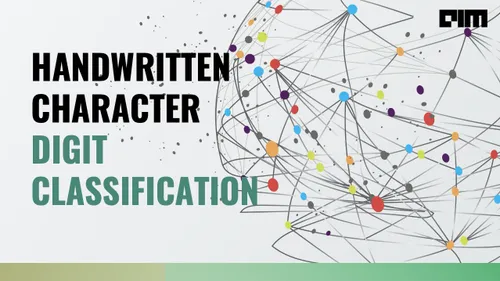


#### Key Features of the MNIST Dataset:
1. **Data Composition**:
   - **Number of Images**: 70,000 grayscale images.
     - **Training Set**: 60,000 images.
     - **Test Set**: 10,000 images.
   - **Image Size**: Each image is 28x28 pixels, resulting in 784 pixels per image.
   - **Pixel Values**: Each pixel in the image has an intensity value between 0 and 255, where 0 represents black (background), and 255 represents white (foreground), with shades of gray in between.

2. **Labels**:
   - Each image represents a handwritten digit (0 to 9).
   - The dataset contains 10 classes corresponding to the digits (0 through 9).
   - Each image is associated with a label indicating the correct digit.

3. **Data Format**:
   - The dataset is provided in the form of two arrays:
     - **Input Array**: A 2D array representing the pixel values of the 28x28 image. This can also be flattened into a 1D array of 784 elements for certain algorithms.
     - **Label Array**: A 1D array representing the digit label corresponding to the image.

#### Data Preprocessing:
Before feeding the data into machine learning models, the following preprocessing steps are usually applied:
1. **Normalization**: Since the pixel values range from 0 to 255, they are usually scaled to a range of [0, 1] by dividing each pixel value by 255. This helps in faster and more stable training of models.
2. **Flattening (Optional)**: For certain models like fully connected neural networks, the 28x28 images are flattened into a single vector of 784 elements. However, for convolutional neural networks (CNNs), the 2D structure is usually retained.



In [30]:
#Loading necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from numpy.random import seed
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [28]:
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as k
from keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

In [40]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

In [5]:
# Load whole dataset initially

(X_train_init,y_train_init), (X_test_init,y_test_init) = mnist.load_data()

# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train_init.shape, y_train_init.shape))
print('Test: X=%s, y=%s' % (X_test_init.shape, y_test_init.shape))

11490434/11490434 [==============================] - 0s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


Here X_train contains 60,000 training images’ data each of size 28x28 and y_train contains their corresponding labels. Similarly, X_test contains 10,000 testing images’ data each of dimension 28x28 and y_test contains their corresponding labels.

#**Analyzing the data**

## **Number distribution**

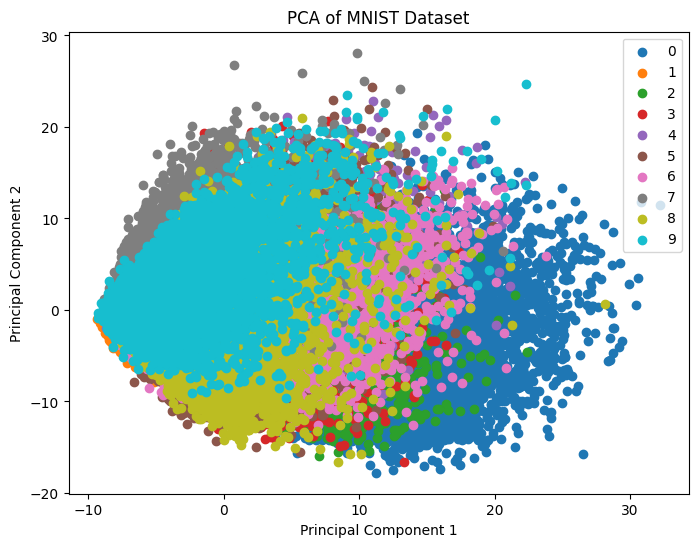

Explained number distribution [0.05646717 0.04078272]


In [13]:
#pca analysis

# Flatten the images
X_train_flat = X_train_init.reshape((X_train_init.shape[0], -1))
X_test_flat = X_test_init.reshape((X_test_init.shape[0], -1))

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components for visualization
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Create a DataFrame for easier plotting
df_train = pd.DataFrame(data=X_train_pca, columns=['PC1', 'PC2'])
df_train['label'] = y_train_init

# Plot the data points with different colors for different labels
plt.figure(figsize=(8, 6))
for label in range(10):
    plt.scatter(
        df_train[df_train['label'] == label]['PC1'],
        df_train[df_train['label'] == label]['PC2'],
        label=str(label)
    )

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of MNIST Dataset')
plt.legend()
plt.show()

# number distribution
print("Explained number distribution", pca.explained_variance_ratio_)

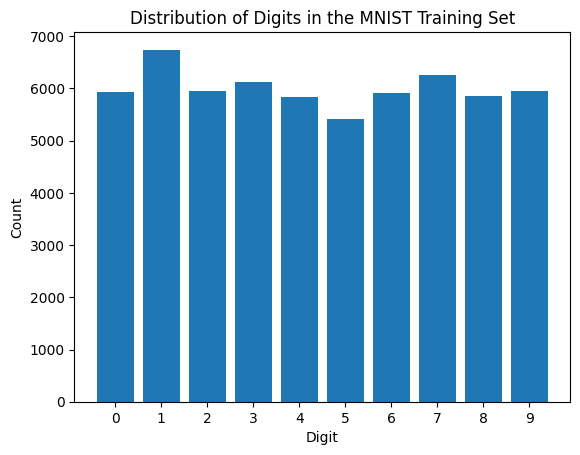

In [14]:
#plot the number distribution among the data
unique_numbers, counts = np.unique(y_train_init, return_counts=True)

plt.bar(unique_numbers, counts)
plt.figaspect(180)
plt.xlabel('Digit')
plt.ylabel('Count')
plt.title('Distribution of Digits in the MNIST Training Set')
plt.xticks(unique_numbers)
plt.show()

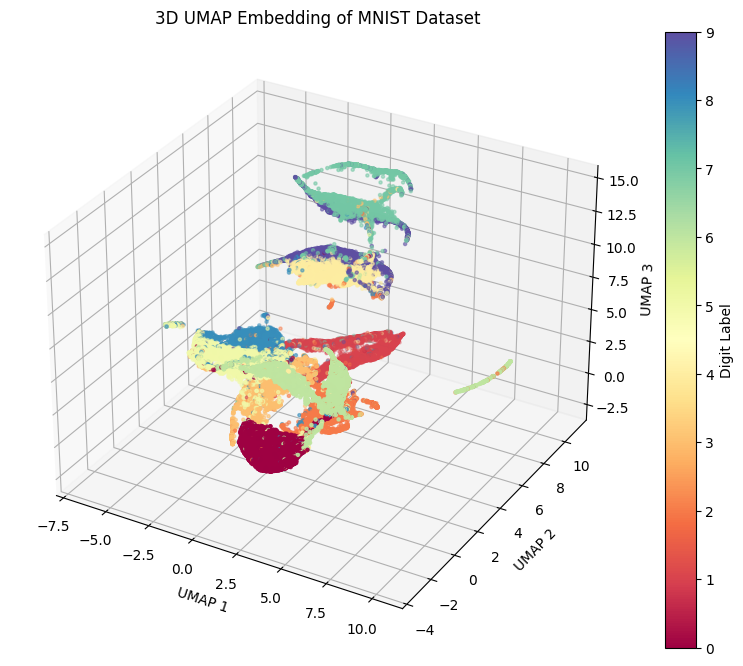

In [17]:
#umap 3D Plot

# Import the UMAP class from umap-learn
import umap # Fixed: import umap directly
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming X_train_scaled is your preprocessed data (e.g., after PCA)
reducer = umap.UMAP(n_components=3, random_state=42) # Now you can use UMAP
embedding = reducer.fit_transform(X_train_scaled)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], c=y_train_init, cmap='Spectral', s=5)

ax.set_xlabel('UMAP 1')
ax.set_ylabel('UMAP 2')
ax.set_zlabel('UMAP 3')
ax.set_title('3D UMAP Embedding of MNIST Dataset')

plt.colorbar(scatter, label='Digit Label')
plt.show()

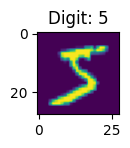

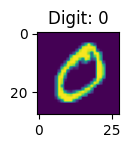

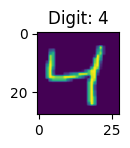

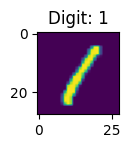

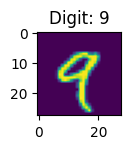

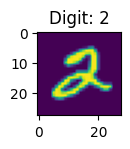

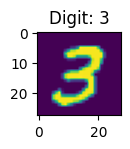

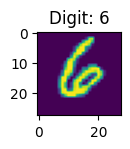

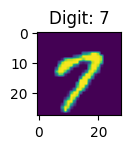

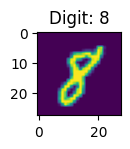

In [18]:
#ploting the each digits
#Create a dictionary to store unique digits and their corresponding images
unique_digits = {}

for i in range(len(X_train_init)):
  digit = y_train_init[i]
  if digit not in unique_digits:
    unique_digits[digit] = X_train_init[i]

# Plot each unique digit
for i, (digit, image) in enumerate(unique_digits.items()):
  plt.subplot(4,4,i+1)
  plt.tight_layout()
  plt.imshow(image)
  plt.title(f"Digit: {digit}")
  plt.show()

In [19]:
#analysing the data
X_train_init[5]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  13,  25, 100, 122,   7,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         33, 151, 208, 252, 252, 252, 146,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  40, 152,
        244, 252, 253, 224, 211, 252, 232,  40,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  15, 152, 239, 252,
        252, 252, 216,  31,  37, 252, 252,  60,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  96, 252, 252, 252,
        252, 217,  29,   0,  37, 252, 252,  60,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 181, 252, 252, 220,
        167,  30,   0,   0,  77, 252, 252,  60,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  26, 128,  58,  22,
          0,   0,   0,   0, 100, 252, 252,  60,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 157, 252, 252,  60,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        110, 121, 122, 121, 202, 252, 194,   3,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  10,  53, 179,
        253, 253, 255, 253, 253, 228,  35,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   5,  54, 227, 252, 243,
        228, 170, 242, 252, 252, 231, 117,   6,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   6,  78, 252, 252, 125,  59,
          0,  18, 208, 252, 252, 252, 252,  87,   7,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   5, 135, 252, 252, 180,  16,   0,
         21, 203, 253, 247, 129, 173, 252, 252, 184,  66,  49,  49,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   3, 136, 252, 241, 106,  17,   0,  53,
        200, 252, 216,  65,   0,  14,  72, 163, 241, 252, 252, 223,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 105, 252, 242,  88,  18,  73, 170, 244,
        252, 126,  29,   0,   0,   0,   0,   0,  89, 180, 180,  37,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 231, 252, 245, 205, 216, 252, 252, 252,
        124,   3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 207, 252, 252, 252, 252, 178, 116,  36,
          4,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  13,  93, 143, 121,  23,   6,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

As we seen and analysed that the data is ranging between 0-255. so we need to scale it for the best and effivient performance


## **Pre-processing the images**


1. Reshape the dataset to have a single channel of columns
2. It is known that MNIST dataset images images are 28x28 with pixel values from 0 to 255. So, that's why, it would be a good idea to scale the pixel data using that information. (maxValue=255)




### **Why sclaling???**

Scaling the pixel intensity values of an image, like the one in your 28x28 ndarray, is important for several reasons in machine learning and deep learning models, especially for tasks like image classification:

1. **Normalization for Faster Convergence**: Most machine learning models, particularly those using gradient-based optimization (like neural networks), perform better when the input data is normalized or scaled to a smaller range, usually between 0 and 1, or -1 and 1. Since pixel values in this ndarray range from 0 to 255, scaling them to a range between 0 and 1 helps the optimization process converge faster and more reliably.

2. **Preventing Numerical Instability**: When input values vary significantly (e.g., from 0 to 255), it can cause numerical instability, especially in deep neural networks. Large inputs can lead to very large gradients, which can result in oscillations or exploding gradients during training. Scaling helps to keep the values more consistent and stable, improving the model’s learning.

3. **Improved Accuracy**: Many machine learning models assume that input features are on a similar scale. When the input data is unscaled (e.g., pixel values from 0 to 255), it may cause the model to assign undue importance to higher-valued features, resulting in poorer performance. By scaling, each pixel has the same influence, helping the model achieve better accuracy.

4. **Compatibility with Activation Functions**: Common activation functions used in neural networks, like Sigmoid or Tanh, work best when inputs are within a certain range (e.g., Sigmoid expects inputs between 0 and 1). Scaling ensures that the input to these functions is within the desired range, allowing them to function as intended.

5. **Consistency Across Different Datasets**: Some datasets might have images with varying ranges of pixel intensities. Normalizing these images to the same range ensures consistency across the dataset, which improves the model's ability to generalize.

By scaling the pixel values (e.g., dividing by 255 to get a range of 0 to 1), we can enhance the performance and stability of the machine learning model, making it easier for the model to interpret and learn from the data.

In [20]:
 # Reshape dataset to have a single channel of columns
X = X_train_init.reshape((60000, 784))
X_test = X_test_init.reshape((10000, 784))

# Prepare the pixel data (images) by scaling them.

X = X.astype('float32')
X_test = X_test.astype('float32')
X= X/255
X_test= X_test/255
print('X shape:', X.shape)

X shape: (60000, 784)


In [21]:
#Re-analysing the data
X[5]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Now the data of the pixel is ranging from 0 - 1

##One-hot encoding on target values
We need to use one hot encoding to conver the each target value into a binary vectors (of length 10) with a 1 in the index of the value itself. For example, if the y value is 4, we will be converting it to [0 0 0 1 0 0 0 0 0 0] array using one-hot encoding array.

In [22]:
y = keras.utils.to_categorical(y_train_init, 10)
y_test = keras.utils.to_categorical(y_test_init, 10)

#Model Building


# Fully Connected Neural Networks

## Convolutional Neural Networks (CNNs)

Convolutional Neural Networks (CNNs) are a type of deep learning algorithm specifically designed to handle grid-like data, such as images, where the input has a clear spatial structure. CNNs have been particularly successful in computer vision tasks like image classification, object detection, and segmentation.

#### Key Components of CNNs:

1. **Convolutional Layers**:
   - These are the core building blocks of a CNN. In a convolutional layer, a small filter (or kernel) slides over the input image, performing a dot product between the filter and the local region of the image. This operation is called *convolution*.
   - **Purpose**: Convolution helps in detecting features like edges, textures, and patterns. The filters are learned during the training process, and each filter detects a different type of feature.
   - **Stride**: This controls how much the filter moves over the image. A stride of 1 means the filter moves one pixel at a time, while a stride of 2 moves two pixels at a time.
   - **Padding**: To maintain the same image size after convolution, padding can be added to the input image, which adds zeros around the edges.

2. **Pooling Layers**:
   - Pooling layers are used to reduce the spatial dimensions (width and height) of the data, which reduces computational complexity and helps prevent overfitting.
   - The most common type is **Max Pooling**, where the maximum value in each local patch of the feature map is taken. Another variant is **Average Pooling**, which takes the average of the values in a patch.
   - **Purpose**: Pooling makes the model invariant to small translations and distortions in the input image and reduces the number of parameters.

3. **Fully Connected (Dense) Layers**:
   - After several convolutional and pooling layers, the high-level features of the image are fed into fully connected layers, just like in a traditional feedforward neural network.
   - These layers are responsible for making predictions based on the learned features. The last fully connected layer usually has as many neurons as the number of output classes in a classification problem, followed by a softmax function to produce probabilities.

4. **Activation Functions**:
   - **ReLU (Rectified Linear Unit)** is the most commonly used activation function in CNNs. It introduces non-linearity into the network, allowing the model to learn complex patterns.
   - ReLU outputs zero for negative values and passes positive values unchanged, which helps prevent issues like vanishing gradients during training.

5. **Flattening**:
   - Before feeding the feature maps from the convolutional and pooling layers into the fully connected layers, the 2D data (or 3D if dealing with color images) is flattened into a 1D vector.
   - **Purpose**: Flattening converts the high-dimensional data into a format suitable for the dense layers.

![image.png](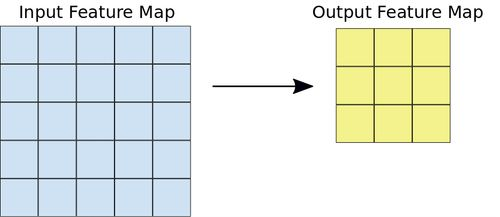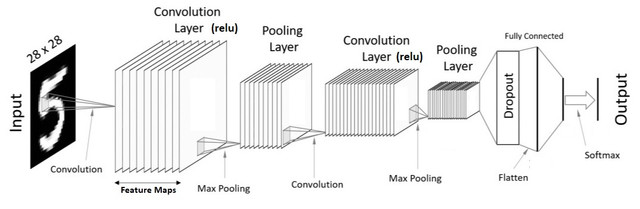)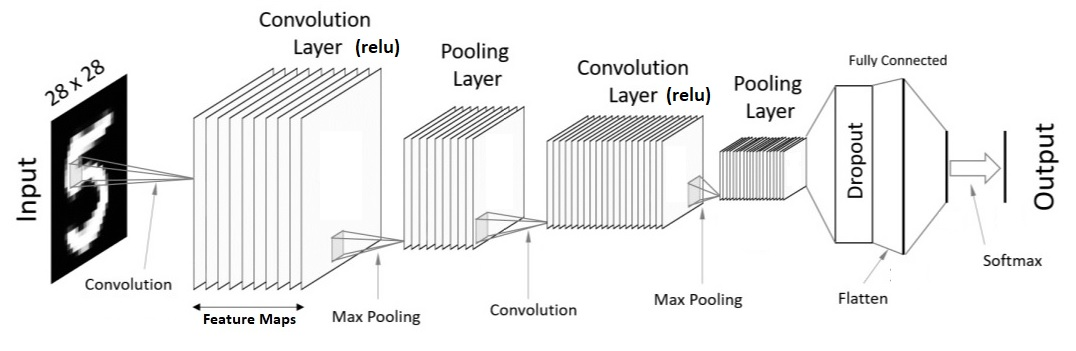

In [23]:
seq_model = Sequential()
seq_model.add(Dense(256, input_dim=28*28, activation='relu'))
seq_model.add(Dense(256, activation='relu'))
seq_model.add(Dense(32, activation='relu'))
seq_model.add(Dense(10, activation='softmax'))

seq_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [24]:
# model summary
seq_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 32)                8224      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 275306 (1.05 MB)
Trainable params: 275306 (1.05 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


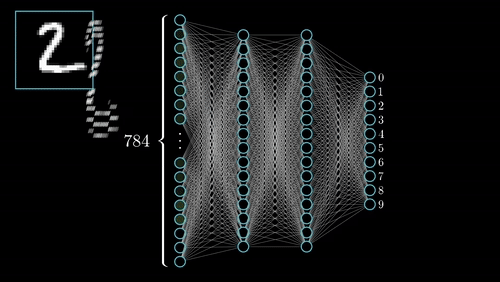

In [25]:
# Fitting fully connected model with validation_split as 0.3
earlystopping = keras.callbacks.EarlyStopping(monitor='val_loss',  min_delta=0, patience=20, verbose=2)
savebest = keras.callbacks.ModelCheckpoint('best.weights.keras', monitor='val_loss', verbose=1, save_best_only=True)

fully_connected_model_fit = seq_model.fit(X, y, batch_size=32, epochs=100, verbose=1, validation_split=0.3,
                                                      callbacks=[earlystopping,savebest])

Epoch 1/100
1311/1313 [============================>.] - ETA: 0s - loss: 0.2508 - accuracy: 0.9259
Epoch 1: val_loss improved from inf to 0.14544, saving model to best.weights.keras
1313/1313 [==============================] - 7s 4ms/step - loss: 0.2506 - accuracy: 0.9260 - val_loss: 0.1454 - val_accuracy: 0.9574
Epoch 2/100
1297/1313 [============================>.] - ETA: 0s - loss: 0.1026 - accuracy: 0.9686
Epoch 2: val_loss improved from 0.14544 to 0.13306, saving model to best.weights.keras
1313/1313 [==============================] - 5s 4ms/step - loss: 0.1027 - accuracy: 0.9686 - val_loss: 0.1331 - val_accuracy: 0.9591
Epoch 3/100
1310/1313 [============================>.] - ETA: 0s - loss: 0.0694 - accuracy: 0.9779
Epoch 3: val_loss improved from 0.13306 to 0.11359, saving model to best.weights.keras
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0693 - accuracy: 0.9780 - val_loss: 0.1136 - val_accuracy: 0.9667
Epoch 4/100
1302/1313 [========================

##Prediction and Model Evaluation

In [26]:
# predicting the model
seq_model.load_weights('best.weights.keras')

# Predict on your test data (assuming you have a separate test set called X_test)
y_pred = seq_model.predict(X_test)

# Convert predicted probabilities to class labels (if necessary)
y_pred_classes = np.argmax(y_pred, axis=1)

# Evaluate the model
loss, accuracy = seq_model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

# You can also generate a classification report or confusion matrix for more detailed evaluation.
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(np.argmax(y_test, axis=1), y_pred_classes))
print(confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes))

313/313 [==============================] - 1s 1ms/step
Test Loss: 0.09227082878351212
Test Accuracy: 0.9814000129699707
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

[[ 966    0    2    1    1    1    2    3    3    1]
 [   0 1127    0    1    0    1    1    1    4    0]
 [   1    2 101

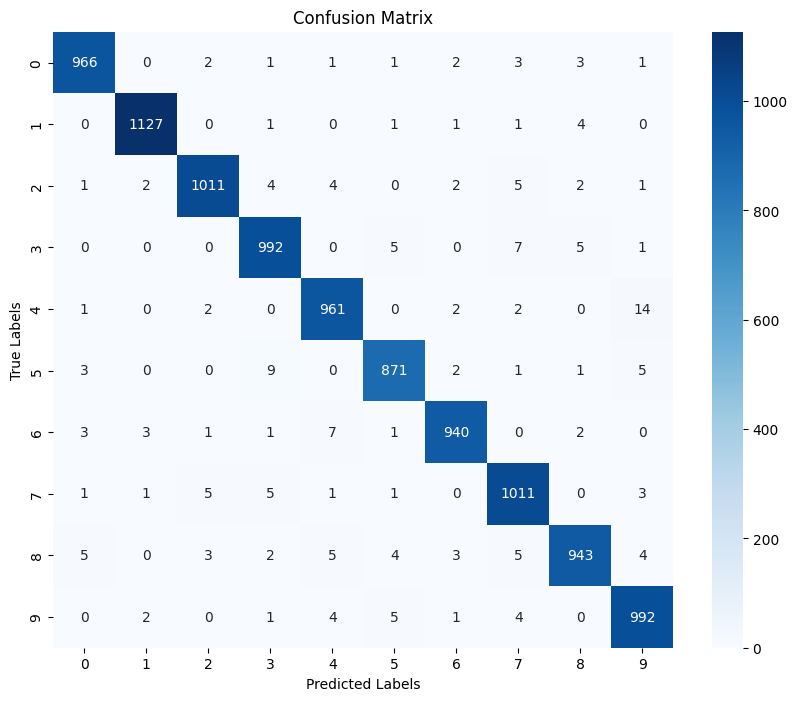

In [31]:
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [32]:
#Accuracy Percent testing
_, acc = seq_model.evaluate(X, y, verbose=0)
print('Accuracy of Training dataset with Fully Connected Layers is %.2f' % (acc * 100.0))
_, acc_test = seq_model.evaluate(X_test, y_test, verbose=0)
print('Accuracy of Testing dataset with Fully Connected Layers is %.2f' % (acc_test * 100.0))

Accuracy of Training dataset with Fully Connected Layers is 99.23
Accuracy of Testing dataset with Fully Connected Layers is 98.14


## Accuracy and Loss Plots of Train & Test Dataset

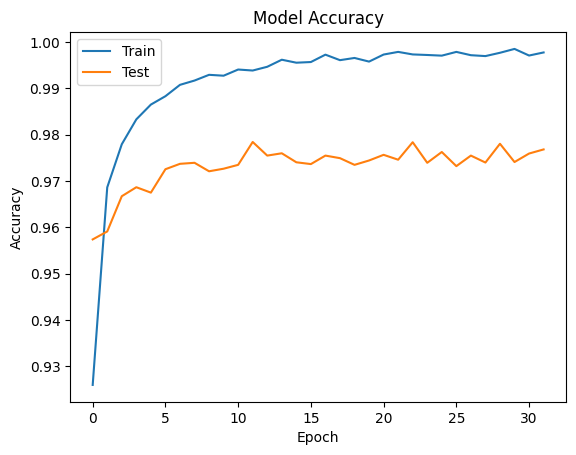

In [33]:
# Accuracy Plot
plt.plot(fully_connected_model_fit.history['accuracy'])
plt.plot(fully_connected_model_fit.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

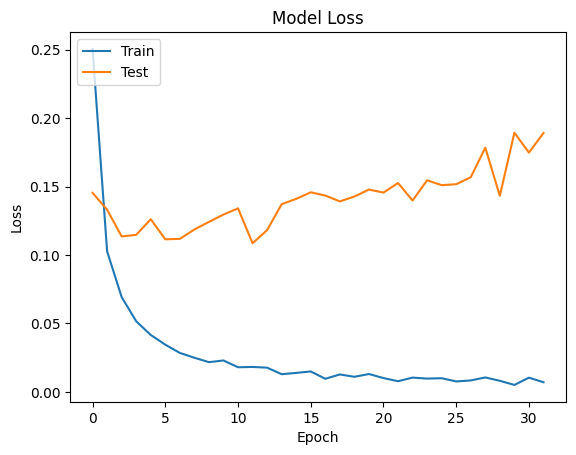

In [34]:
# summarize history for loss
plt.plot(fully_connected_model_fit.history['loss'])
plt.plot(fully_connected_model_fit.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [70]:
def visualize_image(image_path):
    """Visualizes an image.

    Args:
        image_path (str): Path to the image file.
    """
    # Load the image using PIL
    img = Image.open(image_path).convert('L')
    # Convert the PIL Image to a NumPy array
    img_array = np.array(img)

    plt.imshow(img_array, cmap='gray') # Display the NumPy array
    plt.title("Preprocessed Image")
    plt.show()


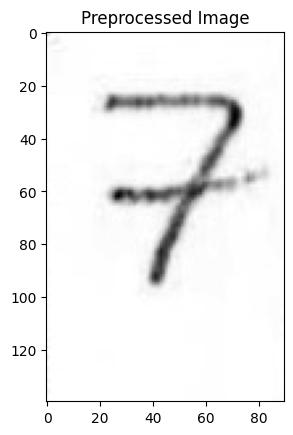

In [73]:
# Visualize the image after preprocessing
img='/content/img_7.jpg'
visualize_image(img)

In [76]:
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image

def preprocess_image_for_flattened_model(image_path, target_size=(28, 28)):
    """
    Preprocess the image to match the model's input requirements (flattened 784 input).

    Args:
        image_path: Path to the image file.
        target_size: Target size for the image (default is (28, 28) for MNIST).

    Returns:
        Preprocessed image ready for prediction.
    """
    # Load the image and convert to grayscale
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = img.resize(target_size)  # Resize to 28x28 pixels

    # Convert the image to a NumPy array
    img_array = np.array(img)

    # Flatten the image into a vector of 784 elements
    img_array = img_array.reshape(1, 784).astype('float32')

    # Normalize pixel values (optional, depending on how the model was trained)
    img_array /= 255.0

    return img_array

# Example usage:
image_path = '/content/img_7.jpg'
input_image = preprocess_image_for_flattened_model(image_path)

# Predict the class using the trained model
prediction = seq_model.predict(input_image)
predicted_class = np.argmax(prediction)

print(f"Predicted class: {predicted_class}")


1/1 [==============================] - 0s 24ms/step
Predicted class: 7


## Model Evaluation
### Overview
The performance of a machine learning model is crucial for understanding its effectiveness in making predictions. In this case, we have assessed a model utilizing fully connected layers, specifically looking at its accuracy on both the training and testing datasets.

#### Training Dataset Accuracy
- Training Accuracy: **99.23%**
  - The model achieved an impressive accuracy of 99.23% on the training dataset. This high accuracy indicates that the model has learned the patterns and relationships within the training data exceptionally well.
  - However, it is essential to interpret this result with caution. While a high training accuracy is often desirable, it can also suggest the potential for overfitting—where the model performs well on training data but may struggle to generalize to new, unseen data.

#### Testing Dataset Accuracy
- **Testing Accuracy: 98.14%**
  - The accuracy on the testing dataset is 98.14%, which is still very high. This result suggests that the model has not only learned well from the training data but has also managed to generalize effectively to the testing data.
  - The slight drop in accuracy from the training to the testing dataset (from 99.23% to 98.14%) is expected and generally acceptable. It reflects that the model maintains strong predictive capabilities without significant overfitting.
### Test Loss and Accuracy
- **Test Loss:** 0.0923
- **Test Accuracy:** 98.14%

### Classification Report
The model demonstrates strong performance across all classes, as indicated by the following metrics:

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|--------|
| 0     | 0.99      | 0.99   | 0.99     | 980    |
| 1     | 0.99      | 0.99   | 0.99     | 1135   |
| 2     | 0.99      | 0.98   | 0.98     | 1032   |
| 3     | 0.98      | 0.98   | 0.98     | 1010   |
| 4     | 0.98      | 0.98   | 0.98     | 982    |
| 5     | 0.98      | 0.98   | 0.98     | 892    |
| 6     | 0.99      | 0.98   | 0.98     | 958    |
| 7     | 0.97      | 0.98   | 0.98     | 1028   |
| 8     | 0.98      | 0.97   | 0.98     | 974    |
| 9     | 0.97      | 0.98   | 0.98     | 1009   |
| **Macro Avg** | **0.98** | **0.98** | **0.98** | **10000** |
| **Weighted Avg** | **0.98** | **0.98** | **0.98** | **10000** |

### Confusion Matrix
The confusion matrix indicates the following results for the ten classes:

\[
\begin{array}{cccccccccc}
966 & 0 & 2 & 1 & 1 & 1 & 2 & 3 & 3 & 1 \\
0 & 1127 & 0 & 1 & 0 & 1 & 1 & 1 & 4 & 0 \\
1 & 2 & 1011 & 4 & 4 & 0 & 2 & 5 & 2 & 1 \\
0 & 0 & 0 & 992 & 0 & 5 & 0 & 7 & 5 & 1 \\
1 & 0 & 2 & 0 & 961 & 0 & 2 & 2 & 0 & 14 \\
3 & 0 & 0 & 9 & 0 & 871 & 2 & 1 & 1 & 5 \\
3 & 3 & 1 & 1 & 7 & 1 & 940 & 0 & 2 & 0 \\
1 & 1 & 5 & 5 & 1 & 1 & 0 & 1011 & 0 & 3 \\
5 & 0 & 3 & 2 & 5 & 4 & 3 & 5 & 943 & 4 \\
0 & 2 & 0 & 1 & 4 & 5 & 1 & 4 & 0 & 992 \\
\end{array}
\]

The confusion matrix shows that the model has a high level of accuracy in classifying digits, with the highest support for digit classes 1, 0, and 6. There are some misclassifications, particularly in classes 5 and 4, where confusion with other digits occurred.

---

## Conclusion
The handwritten digit classification model achieved a test accuracy of 98.14% and a low test loss of 0.0923, indicating a strong performance in recognizing handwritten digits. The precision, recall, and F1-score metrics across all classes are also high, suggesting the model is robust and reliable for this classification task. The confusion matrix highlights minor misclassifications, which can be addressed in future iterations by refining the model architecture or augmenting the training data. Overall, this project demonstrates the effectiveness of using fully connected CNNs for digit classification, paving the way for potential real-world applications in automated handwriting recognition systems.

---